# Task 1

The upperbound on stable matchings will require the generation of all possible match conbinations for both male & female sets of length $n$. 

If the preference tables are such that every single potential matching provides a stable solution then our upperbound on stable matchings will be $n!$

# Task 2

## (a)

See Below

## (b)

In my IS_STABLE function the following data structures were used:

- **Set:** The properties of this data type allows for easy comparison between H and F preference tables, without having to iterate over each individual element. This data type does order numbers which is a problem in this problem as the preference tables should be fixed. However, due to the way my IS_STABLE function determines a solution this is not a problem.

- **Dictionary:** This data structure allows for the elements within to be easily indexed with a customised key. As such, the dictionary is the perfect candidate to represent the preferences for both the men $H$ and women $F$. Dictionary's are mutable as well, but one must take care to copy them and store them in a new variable using the .copy() method. If an attempt is made to store a dictionary by assigning it to a new variable $A$ i.e. $B=dict()$ and $A=B$, any modifications to A will incur the same change to $B$; the original store of the dictionary. 

- **List:** This data type is mutable and therefore allows for the storage and manipulation of multiple elements, a necessary component of my algorithm's solution method. 

- **Tuple:** This data type is like a list but it is immutable, a property which is desirable for representing a candidate matchihng. None of the matchings need to be altered by the my algorithm.

## (c)

We can determine time complexity for **IS_STABLE** by considering all of its iterable processes. 


- $O(n)+ \dots$ is from each the first **for loop** which iterate over the $n$ length matches list.
- $\dots+ O(n-k)+ \dots$ From the second **for loop** which iterates over $n-k$ length preference list. Where $k$ is the maximum between the preferences trimmed from $H$ and $F$

- $\dots+ O((n-u)(n-v)) = O(n^2) - O(n)$ From the last nested **for loop**, which can iterate over $n-v$ female preference tables for each male preference table totalled in $n-u$


As we only consider the most time dominant term when calculating the time complexity of the algorithm, we can discard all other contributions from those iterators which are not the nested for loop; leaving only $ O(n^2) - O(n)$. Of course, to properly calculate the time complexity for **IS_STABLE** we must consider the worst case scenario where $u=0,v=0$, this then leads to a total time complexity of $O(n^2)$



In [88]:
#Task 2(a) - IS_SABLE 

from itertools import zip_longest #Used for zip_longest

def gen_err_check(H_pref,F_pref):
    if type(H_pref) != dict or type(F_pref) != dict: #Raises error if pref tables are not dictionaries
        
        raise TypeError(f"Preference lists must be of type: dict")
    
    if len(H_pref) != len(F_pref): #Raises error if input lists are of varying lengths
        
        raise ValueError("Input dictionaries H_pref and F_pref are not of identical length")

    return

#A=1, B=2, C=3, D=4 | a=1, b=2, c=3,d=4: Keys for H and F suitors 

H = {1:[3,2,4,1], 2:[2,1,3,4], 3:[2,4,1,3], 4:[3,1,4,2]}

F = {1:[1,2,4,3], 2:[3,1,4,2], 3:[3,2,4,1], 4:[2,1,3,4]} # Numerical representation is easier to work with

Mtch = [(1,4),(2,1),(3,2),(4,3)] #Stable match from the example in Lecture 1 of Stable Marriage and Its Relation to Other Combinatorial Problems
                                                                                # by Donald E. Knuth and Martin Goldstein


def IS_STABLE(mtch: list, H_pref : dict, F_pref : dict, rout = False):
    
    
    if len(H_pref) != len(mtch) or len(F_pref) != len(mtch):
        
        raise ValueError(f"Candidate match list is of non-identical length to supplied preference tables")
    
    WF = set()
    WH = set() #Stores 'Winners': those matched with their 1st pref

    N_H = list(H_pref.keys())
    N_F = list(F_pref.keys())
    
    F_temp = F_pref.copy()
    H_temp = H_pref.copy()


    stb = 1 #Stability Indicator, Output of IS_STABLE. 1 is yes 0 is no


    ##Identifying Winners and Losers

    for k_1,k_2 in mtch:

        pH = H_temp[k_1][0] 
        pF = F_temp[k_2][0]  
        
        
        if pH is k_2:
            H_temp.pop(k_1)
            WH.add(k_1) #If H gets 1st pref, add to WH set.


        else: #'Losers' have preference table trimmed
            
            H_temp[k_1] = H_temp[k_1][:H_temp[k_1].index(k_2)] 


        if pF is k_1:
            F_temp.pop(k_2)
            WF.add(k_2)
        else:
            F_temp[k_2] = F_temp[k_2][:F_temp[k_2].index(k_1)] #Unsatisfied Hs and Fs will have both those
                                                               #they prefer less than their curernt partner
                                                               #and their current partner removed from their preferences.



    key_Hs = set(N_H) - WH
    key_Fs = set(N_F) - WF #Removes 'content' individuals from being iterated over. 
                         #They won't take part in the next bit.


    ### Affair Process

    ##Removes the 'Winners' from the 'Loser's preference tables

    for k_F, k_H in zip_longest(key_Fs,key_Hs):

        if k_F is not None:


            F_temp[k_F]= list(set(F_temp[k_F]) - WH)

            if not F_temp[k_F]:
                F_temp.pop(k_F)

        if k_H is not None:

            H_temp[k_H]= list(set(H_temp[k_H]) - WF)

            if not H_temp[k_H]:
                H_temp.pop(k_H)


    ##Identifies potential affairs from those remaining
    for s_H, p_H in H_temp.items():

        for s_F,p_F in F_temp.items():

            if s_F in p_H and s_H in p_F: #Unstable if suitor F and suitor H are mutually amores 

                stb = 0
    
    if rout is True:
    
        if stb == 1:
            print('Current Matching is Stable')

        elif stb == 0:
            print('Current Matching is Un-Stable')    
    
    return stb


## Test Run on Stable and Un-Stable solutions
mtch_stble = [(1,4),(2,1),(3,2),(4,3)]
mtch_unstble = [(1,3),(2,2),(3,4),(4,1)]

IS_STABLE(mtch_stble,H,F,True)
IS_STABLE(mtch_unstble,H,F,True)



Current Matching is Stable
Current Matching is Un-Stable


0

# Task 3

## (a)

See Below

## (b) 

**STABLE_MATCHINGS** relys on two funcitons to do most of the heavy lifting; **IS_STABLE** we have already encountered, but the second, **pair_gen** was written to generate all the potential combinations for two different sets, each of length $n$. Both **STABLE_MATCHINGS** and **pair_gen** make use of only one unique data structure: **list**. The reasons are identical to the ones stated for **IS_STABLE**, that is, beacuse they can store many elements, can be iterated over and they are immutable.


## (c)


Because of the function **itertools.permutaions** in **pair_gen**, which itself is inside **STABLE_MATCHINGS** the overall time complexity for **STABLE_MATCHINGS** have to also account for those functions. 

If we total Time Complexity we have:

$O(n!) + \dots$(**itertools.permutaions**)  $\dots + O(n) + \dots$   (**pair_gen**)

$\dots + O(n)$   (**STABLE_MATCHINGS*)

- $O(n)$ is from each **for loop**, which iterates over an $n$ length list of elements.
- $O(n!)$ is from **itertools.permutaions** which must iterate ove $n!$ permutaions for a list of length $n$.

As we only consider the most time dominant term when calculating the time complexity of the algorithm, we can discard all $O(n)$ terms leaving us with $O(n!)$ as **STABLE_MATCHINGS** time complexity.

In [113]:
#Task 3 (a) pt.1 - Defining Pair Gen 
from itertools import permutations 


def pair_gen(A,B):

    unique_combinations = [] #Store all unique combinations of matchings from A and B

    permut = permutations(A, len(B)) #Obtains all permutations of A in lists of len(B)


    for comb in permut:
        zipped = zip(comb, B) #pair A permutaion with elements in B to get AB combination pairs
        
        unique_combinations.append(sorted(list(zipped))) #Adds a sorted list of the AB combinations to maintain format for 
                                                         #use in STABLE_MATCHINGs


    return unique_combinations


t = pair_gen(['A','B','C','D'],['a','b','c','d'])

print(len(t)) #Number of Combination for 2 lists of length 4 is 4! = 24

print(t)

24
[[('A', 'a'), ('B', 'b'), ('C', 'c'), ('D', 'd')], [('A', 'a'), ('B', 'b'), ('C', 'd'), ('D', 'c')], [('A', 'a'), ('B', 'c'), ('C', 'b'), ('D', 'd')], [('A', 'a'), ('B', 'd'), ('C', 'b'), ('D', 'c')], [('A', 'a'), ('B', 'c'), ('C', 'd'), ('D', 'b')], [('A', 'a'), ('B', 'd'), ('C', 'c'), ('D', 'b')], [('A', 'b'), ('B', 'a'), ('C', 'c'), ('D', 'd')], [('A', 'b'), ('B', 'a'), ('C', 'd'), ('D', 'c')], [('A', 'c'), ('B', 'a'), ('C', 'b'), ('D', 'd')], [('A', 'd'), ('B', 'a'), ('C', 'b'), ('D', 'c')], [('A', 'c'), ('B', 'a'), ('C', 'd'), ('D', 'b')], [('A', 'd'), ('B', 'a'), ('C', 'c'), ('D', 'b')], [('A', 'b'), ('B', 'c'), ('C', 'a'), ('D', 'd')], [('A', 'b'), ('B', 'd'), ('C', 'a'), ('D', 'c')], [('A', 'c'), ('B', 'b'), ('C', 'a'), ('D', 'd')], [('A', 'd'), ('B', 'b'), ('C', 'a'), ('D', 'c')], [('A', 'c'), ('B', 'd'), ('C', 'a'), ('D', 'b')], [('A', 'd'), ('B', 'c'), ('C', 'a'), ('D', 'b')], [('A', 'b'), ('B', 'c'), ('C', 'd'), ('D', 'a')], [('A', 'b'), ('B', 'd'), ('C', 'c'), ('D', 'a'

In [60]:
#Task 3 (a) pt. 2 - Defining STABLE_MATCHINGS

H = {1:[3,2,4,1], 2:[2,1,3,4], 3:[2,4,1,3], 4:[3,1,4,2]}

F = {1:[1,2,4,3], 2:[3,1,4,2], 3:[3,2,4,1], 4:[2,1,3,4]}   

def STABLE_MATCHINGS(H_pref, F_pref):
    
    gen_err_check(H_pref, F_pref)
    
    Hs = list(H_pref.keys())
    Fs = list(F_pref.keys())
    
    nfact_mtchs = pair_gen(Hs,Fs)
    stbles = []
    
    ## Iterates over all combinations of H and F matchings
    ## Uses IS_STABLE to validate stability, if yes it is
    ## stored in stbles.
    for mtch in nfact_mtchs:
        
        ind = IS_STABLE(mtch,H_pref,F_pref)

        if ind == 1: 
            stbles.append(mtch) #Adds stable solution to list      

    return stbles



STABLE_MATCHINGS(H, F) #Function identifies the single stable matchings for the given preference tables as stated in the 
                       #in Stable Marriage and Its Relation to Other Combinatorial Problems

[[(1, 4), (2, 1), (3, 2), (4, 3)]]

# Task 4

In [9]:
#Task 4: Generates a random preference table for each of the inputted lists
import random

def pref_gen(A,B):
    
    N = len(A)
    
    if len(A) != len(B): #Raises error if input lists are of varying lengths
        
        raise ValueError("Input lists A and B are not of identical length") 
    
    
    #Generates the an individual's preference for those in the other list
    #for both of the input lists.
    
    A_prefs = {i:random.sample(B,N) for i in A}
    
    B_prefs = {i:random.sample(A,N) for i in B}
    
    return A_prefs,B_prefs


pref_gen(['A','B','C','D'],['a','b','c','d'])

({'A': ['a', 'b', 'd', 'c'],
  'B': ['b', 'd', 'a', 'c'],
  'C': ['b', 'a', 'd', 'c'],
  'D': ['a', 'c', 'd', 'b']},
 {'a': ['D', 'C', 'B', 'A'],
  'b': ['B', 'D', 'A', 'C'],
  'c': ['A', 'C', 'D', 'B'],
  'd': ['C', 'B', 'A', 'D']})

# Task 5

Improving the **Replicability** of my code means I should provide some supplementary ressource which will allow future researchers to re-create my algorithms without needing to parse and understanding of my code. A task which takes unnecessary time; requiring this hypothetical researcher to trawl through dense code with unintuitve quirks, arising from an individuals unique coding style.

To avoid this unnecessary messing around, I can provide pseudocode translations of the algorithms **IS_STABLE** and **STABLE_MATCHINGS**. Psuedocode allows for these algorithms to be expressed in a much more intuitive way, as well as being easier on the eye. Because **STABLE_MATCHINGS** also includes **pair_gen** in its structure, I have also included its formulation in psuedo-code



## IS_STABLE

#### Variables:
$H$: Set of length $n$ containing all men.

$F$: Set of length $n$ containing all women.

$h$: A man $h \in H$

$f$: A woman $f \in F$

$W_H$: Set of male 'winners'; those matched with their $1^{st}$ preference

$W_F$: Set of female 'winners'

#### Inputs:

$\text{PREFS}_H$: type: dict : Every man in $H$ and each their own preference table for the women in $F$

$\text{PREFS}_F$: type: dict : Every women in $F$ and each their own preference table for the men in $H$ 

$M$ : type: list of tuples: A list of candidate paired matchings of length $n$ for all $H$ and $F$. Format for a pairing: $(h,f)$

#### Outputs:

$stb$: int binary: Indicates if candidate solution is stable $stb \rightarrow 1$ and unstable $stb \rightarrow 0$

* *  *

#### Algorithm

**Initialise** $stb \rightarrow 1$

**for** each pair $(h,f)$ in $M$ **do**
>**if** $h$'s $1^{st}$ preference is $f$ **then**
>>withdraw $h$ from $\text{PREFS}_H$,
>>add $h$ to $W_H$

>**else**    
>>remove $f$ and those $<$ prefered than $f$ from $\text{PREFS}_h$ ($h$'s preference table)

>Repeat above conditional with $h$ $\leftrightarrow$ $f$ and $W_H$ replaced with $W_F$

**end**;


   
**for** $(h,f)$ not in $(W_H,W_F)$ **do**

>remove elements within $W_H$ from $\text{PREFS}_f$, **ditto** for $W_F$ in $\text{PREFS}_h$

>**if** $\text{PREFS}_f$ / $\text{PREFS}_h$'s is Empty **then**
>>withdraw $f$ / $h$ from $\text{PREFS}_F$ / $\text{PREFS}_H$

**end**;

**for** $h$ in $\text{PREFS}_H$ **do**
>**for** $f$ in $\text{PREFS}_F$ **do**
>>if $f$ is in $\text{PREFS}_h$ and $h$ is in $\text{PREFS}_f$ **then**
>>>$stb$ $\rightarrow$ 0

>**end;**

**end;**

*  * *

## STABLE_MATCHINGS

#### Variables:

$I$: Candidate pairing's stability indicator $I \rightarrow 1$ for stable and $I \rightarrow 0$ for unstable

$M$ : A list of candidate paired matchings of length $n$ 

#### Inputs:

$\text{PREFS}_H$: type: dict : Every man in $H$ and each their own preference table for the women in $F$

$\text{PREFS}_F$: type: dict : Every women in $F$ and each their own preference table for the men in $H$ 

($ALL_M$ Provided by **pair_gen** in function) : type: list of lists: A list of length $n!$ containing all candidate paired matchings for all $H$ and $F$ each of length $n$. Format for a pairing: $(h,f)$

#### Outputs:

$stbles$: type: list of lists: A list containing every list of length $n$ candidate matchings which were found to be stable 

* * *

#### Algorithm



**for** $M$ in $ALL_M$ **do**
>$I \leftarrow$ **output** of **IS_STABLE**($M$, $\text{PREFS}_H$, $\text{PREFS}_F$)

>**if** $I == 1$ **then**
>> add $M$ to $stbles$

**end;**

* * *

## pair_gen (inside STABLE_MATCHINGS)

#### Variables:

$Aperms$: A list of lists of length $n$ containing all possible permutaions of list $A$

$N$: The length of list $A$, where $len(A) == len(B)$

$comb$: A given combination in $Aperms$

#### Inputs:

$A$: type: list : A list of length $n$ 

$B$: type: list : A list of length $n$


#### Outputs:

$unicombs$: type: list of lists: A list of length $n!$ containing every combination of candidate pairings between lists $A$ and $B$

#### Functions Used

From itertools libary: **permutations(A:list,N:int)** , which outputs an iterable series of $N$ ($1 \geq N\leq len(A)$) length orderings of $A$ for all its permutations.


* * *

#### Algorithm

$Aperms \leftarrow$ **permutaions**(A,N)

**for** $comb$ in $Aperms$ **do**
>zipped $\leftarrow$ zip(comb,B)

>sort zipped then add to $unicombs$


**end;**


*  * *

# Task 6

## Method

Measuring average execution time of IS_STABLE and STABLE_MATCHINGS $t(N)$ for varying preference table size in $H$ and $F$, taken over repeat measuremnts $M$:

| Function | N (Length of H & F) | M (Repeated Simulations) |
| --- | --- | --- |
| IS_STABLE | [4,5,6,7,8,9,10,11] | 100|
| STABLE_MATCHINGS | [4,5,6,7,8,9,10] | 3 |


### IS_STABLE

Initialise test with the generation of random preference tables **A_pref** and **B_pref**, for each instance of $n \in N$ run **pair_gen** to obtain all $n!$ A,B match combinations. Run **IS_STABLE** $M$ times where each candidate match is randomlly sampled from all match combinations. 

Average execution time for a given $n$ is then calculated from the sample mean of $M$ execution times. The standard error can also be obtained from these results. 

### STABLE_MATCHINGS

For each $n$ in $M$ repeated simulations generate the random preference tables as before, average execution time and standard error can be obtained in the same way.

Note that only $M=3$ repeat measurements were taken for this functions test, this is due to the large computational time required for STABLE_MATCHINGS as M increases. However, as you will see from the results **STABLE_MATCHINGS** empirically displays time complexity of order $O(n!)$ with very little uncertainty.

****************


In [122]:
#Task 6 - Measuring Time Complexity
import numpy as np
import time 


def timer(N,M, mode = 'b'):
    def decorator(func):
        def wrapper(*args, **kwargs):
            times = np.zeros(M)
            
            A = [i for i in range(1,N)]
            B = A
            A_pref, B_pref = pref_gen(A,B) #Generates Preference Tables
            
            if mode == 'a': #Used to measure IS_STABLE
                
                nfact_mtchs = pair_gen(A,B)
                
                for i in range(M):
                
                    t = random.randint(0,N-1)
                    mtch = nfact_mtchs[t]

                    start_time = time.perf_counter()
                    func(mtch,A_pref,B_pref,*args, **kwargs)
                    end_time = time.perf_counter()
                    elapsed_time = end_time - start_time
                    times[i] = elapsed_time
                
            elif mode == 'b': #Used to measure STABLE_MATCHINGS and STBSOL_finder
                for i in range(M):
                    
                    A = [i for i in range(1,N)]
                    B = A
                    A_pref, B_pref = pref_gen(A,B) #Generates Preference Tables
                    
                    start_time = time.perf_counter()
                    func(A_pref,B_pref,*args, **kwargs)
                    end_time = time.perf_counter()
                    elapsed_time = end_time - start_time
                    times[i] = elapsed_time

            return times
        return wrapper
    return decorator


In [123]:
##IS_STABLE
random.seed(1234)

M = 100
N = [4,5,6,7,8,9,10,11]


errs_IS = np.zeros(len(N)) # Standard Error: IS_STABLE

N_ts_IS = np.zeros(len(N)) # Average Execution Time: IS_STABLE


for i in range(0,len(N)):

    result_IS = timer(N[i],M,mode = 'a')(IS_STABLE)()
    
    if M > 2:
        
        errs_IS[i] = np.std(result_IS) / np.sqrt(len(result_IS))
        
    N_ts_IS[i] = np.mean(result_IS)
    
    print(f"Run {N[i]} is done")

Run 4 is done
Run 5 is done
Run 6 is done
Run 7 is done
Run 8 is done
Run 9 is done
Run 10 is done
Run 11 is done


In [115]:
##STABLE_MATCHINGS

M = 3
N = [4,5,6,7,8,9,10]


errs_SM = np.zeros(len(N)) # Standard Error: STABLE_MATCHINGS

N_ts_SM = np.zeros(len(N)) # Average Execution Time: STABLE_MATCHINGS



for i in range(0,len(N)):

    result_SM = timer(N[i],M,mode = 'b')(STABLE_MATCHINGS)()
   
    
    if M > 2:
        errs_SM[i] = np.std(result_SM) / np.sqrt(len(result_SM))

        
    N_ts_SM[i] = np.mean(result_SM)
 
    
    print(f"Run {N[i]} is done")

Run 4 is done
Run 5 is done
Run 6 is done
Run 7 is done
Run 8 is done
Run 9 is done
Run 10 is done


## Results

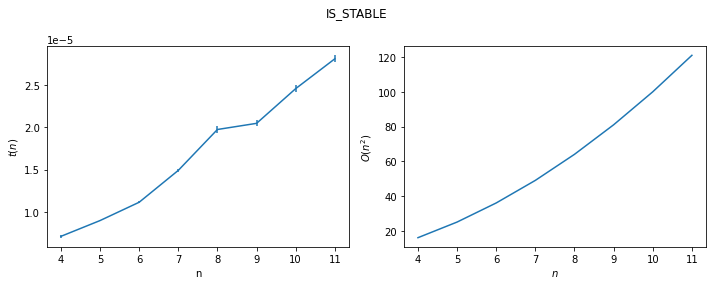

In [124]:
#IS_STABLE RESULTS
import matplotlib.pyplot as plt
import numpy as np

N = [4,5,6,7,8,9,10,11]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figsize as needed

axs[0].errorbar(N,N_ts_IS,errs_IS)
axs[0].set_ylabel('$t(n)$')
axs[0].set_xlabel('n')

axs[1].plot(N,np.square(N))
axs[1].set_xlabel('$n$')
axs[1].set_ylabel('$O(n^2)$')

fig.suptitle('IS_STABLE')

plt.tight_layout()

plt.show()

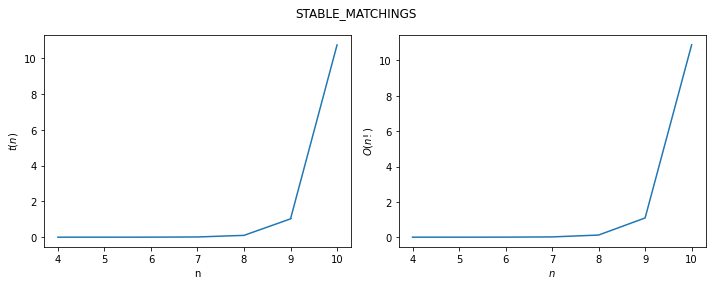

In [120]:
#STABLE_MATCHINGS RESULTS

from math import factorial
import scipy.special

N = [4,5,6,7,8,9,10]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjust figsize as needed


axs[0].errorbar(N,N_ts_SM,errs_SM)
axs[0].set_ylabel('$t(n)$')
axs[0].set_xlabel('n')

axs[1].plot(N,(120/4)*scipy.special.factorial(N)/1e7)
axs[1].set_xlabel('$n$')
axs[1].set_ylabel('$O(n!)$')

fig.suptitle('STABLE_MATCHINGS')

plt.tight_layout()

plt.show()

### IS_STABLE

We can see that the empirical time complexity of the IS_STABLE funciton roughly obeys the theoretical one of $O(n^2)$ defined in **Task 1(c)**. However, even though a limited amount of uncertainty is demonstrated in these results, they still don't strictly obey the worst case scenario of $O(n^2)$ must occur very few times. However, there is a limitation in how I've chosen to conduct this study as I keep preference tables constant for all $M$ repeated sims, however this isn't testing for arkward non-compatable preference tables which may explain why time complexity does not exactly follow  $O(n^2)$ closely. 


### STABLE_MATCHINGS

There is little difference between the empirical and theoretical time complexity for this function, as there is only a very little error when taking multiple iterations as a majority of the time burden originates from the pref_gen function within STABLE_MATCHINGS which as we've established has time complexity $O(n!)$

Comparing our results with a plot of $N$ against $N!$ we can confirm that STABLE_MATCHINGS is of the order $O(n!)$.


# Task 7

## (a)

The undesirable man $\Omega$ can be implimented into the F preference tables by simpling adding it to the end for every women i.e. $F = \{a:[A,C,B,D,\Omega], b:[B,D,C,A,\Omega], \dots\}$. As $\Omega$ is the least prefered option for each women, they will take any other man over $\Omega$ if they are initially paired with him. If numbers are used to represent the $n$ men and $n$ women the undesirable man can be included by setting $\Omega = n+1$ and adding it to each of the women's preference tables. 

In my implementation of the fundamental algorithm from lecture 2 of Stable Marriage and Its Relation to Other Combinatorial Problems this inclusion is not necesary, before each cycle my algorithm removes the womens current partner and all those she prefers less than them from her preference table. Further matchings are then based on who is left. As in this algorithm all women are already paired with $\Omega$, his addition and subsequent removal would be redundant.

## (b) 

See Below

## (c)

**STBSOL_finder** consists of two iterable loops nested within each other. The first while loop must always iterate over $n$ matches, the second can vary depending on the number of swaps required later on. Thes worst case scenario would be iterating over all the males once more, which we've already established would be for $n$ iterations. Therefore we can say that **STBSOL_finder** will have a worst case time complexity of $O(n^2)$,


In [75]:
#Task 7 - Impliment Algo From Book Fundamental Algorithm

H = {1:[3,2,4,1], 2:[2,1,3,4], 3:[2,4,1,3], 4:[3,1,4,2]}

F = {1:[1,2,4,3], 2:[3,1,4,2], 3:[3,2,4,1], 4:[2,1,3,4]}   


def STBSOL_finder(H_prefs, F_prefs, test = False):
    
    gen_err_check(H_prefs, F_prefs)
    
    H = H_prefs.copy()
    F = F_prefs.copy() #Copies pref tables for solution process
   
    F_keys = list(F.keys())
    H_keys = list(H.keys())
    
    k = 0
    n = len(H_prefs)
    
    
    ###Initialises Matches and 'Undesirable Man' based on pref table format
    if type(F_keys[0]) == str:
        
        omga = 'Z'
        mtch = {i : omga for i in F_keys}
        
    elif type(F_keys[0]) == int:
        
        omga = n + 1 #Undesirable Male
        mtch = {i : omga for i in range(1,omga)}
   

    
    ###Algorithm 2 as seen in description
    while k < n:

        X = H_keys[k] 

        while X is not omga:

            x = H[X][0]

            x_p = F[x] 

            if X in x_p:

                X_hld = mtch[x]
                mtch[x] = X
                F[x] = F[x][:F[x].index(X)]

                X = X_hld



            if X is not omga:

                H[X].remove(x) #Suitors previous partner is removed from their preference list


        k = k + 1
        
    sol = sorted([(j,i) for i,j in mtch.items()])
    
    if test is True:
            
        IS_STABLE(sol,H_prefs,F_prefs,True)
            
    return sol


STBSOL_finder(H,F,True)  #Function identifies the single stable matchings for the given preference tables as stated in the 
                         #Stable Marriage and Its Relation to Other Combinatorial Problems textbook.
                         #Function uses IS_STABLE to validate if this answer is correct.

Current Matching is Stable


[(1, 4), (2, 1), (3, 2), (4, 3)]

# Task 8


In [125]:
#Task 8
import pandas as pd

H_preference_table = pd.DataFrame({"Anatole" : ["cunegonde","brigitte","donatienne","antoinette"],
                                   "Barnabe" : ["brigitte","antoinette","cunegonde","donatienne"],
                                   "Camille" : ["brigitte","donatienne","antoinette","cunegonde"],
                                   "Dominique" : ["cunegonde","antoinette","donatienne","brigitte"]                              
                                })


F_preference_table = pd.DataFrame({"antoinette" : ["Anatole","Barnabe","Dominique","Camille"],
                                   "brigitte" : ["Camille","Anatole","Dominique","Barnabe"],
                                   "cunegonde" : ["Camille","Barnabe","Dominique","Anatole"],
                                   "donatienne" : ["Barnabe","Anatole","Camille","Dominique"]                              
                                })

def sol_scooper(sols,H_key,F_key):
        
    H_sol = []
    F_sol = []
    
    
    for i in sols:
        
        H_sol.append(i[0])
        F_sol.append(i[1])


    return ([H_key[IN] for IN in H_sol],[F_key[IN] for IN in F_sol])


def panda_solver(H_noms,F_noms, algo = 1):
    
    H_enc = dict()
    F_enc = dict()

    F_key_ctonom = dict()
    H_key_ctonom = dict() #Character (e.g. A) -> Name (e.g. Anatole) conversion key

    
    ## Encodes names into initial for both tables
    
    for i, j, in zip(H_noms.items(), F_noms.items()):


        H_enc[i[0][0]] = [nom[0] for nom in i[1].tolist()]
        F_enc[j[0][0]] = [nom[0] for nom in j[1].tolist()]


        H_key_ctonom[i[0][0]] = i[0]
        F_key_ctonom[j[0][0]] = j[0]
        
    
    ##Allows users to choose which algorithm to obtain solution
    
    if algo == 1:
        
        sols = STABLE_MATCHINGS(H_enc,F_enc)
        
        
        
    elif algo == 2:
        
        sols = STBSOL_finder(H_enc,F_enc)
        
    else:
        
        raise ValueError("The argument algo only accepts ints 1 or 2")
        
    
    ##Converts solutions back into dataframe of names format
    
    if type(sols[0]) is list: #If multiple solutions are found they are all decoded and returned
        
        dataM = []
        dataF = []
        for sol in sols:
            M_sol,F_sol = sol_scooper(sol,H_key_ctonom,F_key_ctonom)
            dataM.append(M_sol)
            dataF.append(F_sol)
        

        if len(dataM) == 1:
            data = {"Men":dataM[0],"Women":dataF[0]} # For one solution to maintain df format
            
        else: 
            data = {"Men":dataM,"Women":dataF}
        
        frame = pd.DataFrame(data)
        
    elif len(sols) == 0: #If no solutions are found user is informed and nothing is returned
        print('No Solutions Were Found')
        frame = None
    
    else:
        M_sol,F_sol = sol_scooper(sols,H_key_ctonom,F_key_ctonom)
        data = {"Men":M_sol,"Women":F_sol}
        frame = pd.DataFrame(data)
    
    return frame



panda_solver(H_preference_table,F_preference_table)


,Men,Women
0,Anatole,donatienne
1,Barnabe,antoinette
2,Camille,brigitte
3,Dominique,cunegonde


# Task 9


A useful test for the codes solution handeling ability would be to assess how well these algorithms deal with preference tables which lead to multiple stable solutions, especially as $n$ increases. One could set up an algorithm like that used in the timer function, with the inclusion of a try except statement. The function could slowly increase $n$ after each set of $M$ repeated cycles, where for each $M$ preference tables can be generated using $Task 4$ code. This could be done for a finite $N$ and $M$ if the code fails for any of these randomly generated problems, the **except** can output an error, $N$ and the offending preference tables. Such a test would demonstrate the programs **Repeatablity** in the sense that it can output the same and expected behaviour for a large variety of random inputs. 

I have also provided some tests below, the first function **error_tester** checks if the functions produce useful erros if given incorrect input, which demonstrates **Re-usability** as it makes interfacing with the functions easier.

I have also included a **valid_tester** function which uses a baseline problem seen in the first chapter of the textbook, to ensure that with any modifications to the algorithm it passes that first test. Again demonstrating **Re-usability**

As for **Re-Runability** although I cannot garuntee that the function itertools will maintain its compatability with succesive updates, I have still mentioned its use whem discussing my algorithm **IS_STABLE**



In [86]:
def error_tester(func):
    def wrapper():
        
        print(f'Testing {func.__name__} ability to handle preference tables with non identical length:')
        A = [i for i in range(1,5)]
        B = [i for i in range(1,5-1)]
        A_pref, throw = pref_gen(A,A) 
        B_pref, throw = pref_gen(B,B) #Deliberatly generates preference tables of different lengths
        
        if func == IS_STABLE:
            print('For IS_STABLE test, matchs has non-identical length to H_pref and F_pref')
            mtch = pair_gen(A,A)[1]
            func(mtch,A_pref,B_pref)
        
        func(A_pref,B_pref)      
      
        return 
    return wrapper



In [87]:
error_tester(STABLE_MATCHINGS)()

Testing STABLE_MATCHINGS ability to handle preference tables with non identical length:


ValueError: Input dictionaries H_pref and F_pref are not of identical length

In [110]:
#Given an algorithm for obtaining a solution for the marriage provblem valid_tester checks if it can correctly obtain 
#the single solution for the problem in lecture 1 of the textbook.

def valid_tester(func):
    def wrapper():
        
        H = {'A':['c','b','d','a'], 'B':['b','a','c','d'], 'C':['b','d','a','c'], 'D':['c','a','d','b']}
        F = {'a':['A','B','D','C'], 'b':['C','A','D','B'], 'c':['C','B','D','A'], 'd':['B','A','C','D']} 
        
        print(f'Testing {func.__name__} with preference tables: \n\n Male: {H} \n Female: {F}')
        
        
        sol = func(H,F)
        stble_mtch = [('A', 'd'), ('B', 'a'), ('C', 'b'), ('D', 'c')]
        
        
        print('\n --------- \n')
        
        if type(sol) is not list: #Error if func output isn't a list of tuples
        
            raise TypeError(f"{func.__name__} should store its solution as a list of tuples")
        
        elif type(sol[0]) is list:
            
            if  len(sol) != 1: #Warns user that their function is incorrectly producing extra 'stable' solutions
                
                print(f"This problem has only one stable solution:{stble_mtch}")
    
                print(f"\n{func.__name__} is treating non-stable solutions as stable")
            
            elif sol[0] == stble_mtch:
                print(f"{func.__name__} has found the correct solution: {stble_mtch}")
                
            else:
                print(f"{func.__name__} solution is incorrect")
                print(f"\n in the incorrect format. Correct format: [(M,F),(M,F)....]")
        
        elif sol == stble_mtch:
            print(f"{func.__name__} has found the correct solution: {stble_mtch}")
        
        else:
            print(f"{func.__name__} solution is incorrect")
            print(f"\n in the incorrect format. Correct format: [(M,F),(M,F)....]")
            
      
        return 
    return wrapper


#If future users make any alterations to the funcitons, or create their own, valid_tester can verify if these edited/new
#functions solve the first problem correctly. 

In [111]:
valid_tester(STABLE_MATCHINGS)()

Testing STABLE_MATCHINGS with preference tables: 

 Male: {'A': ['c', 'b', 'd', 'a'], 'B': ['b', 'a', 'c', 'd'], 'C': ['b', 'd', 'a', 'c'], 'D': ['c', 'a', 'd', 'b']} 
 Female: {'a': ['A', 'B', 'D', 'C'], 'b': ['C', 'A', 'D', 'B'], 'c': ['C', 'B', 'D', 'A'], 'd': ['B', 'A', 'C', 'D']}

 --------- 

STABLE_MATCHINGS has found the correct solution: [('A', 'd'), ('B', 'a'), ('C', 'b'), ('D', 'c')]
